In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)

# Nobel data (same file you used in 01_nobel.ipynb)
nobel = pd.read_csv("nobel_prizes_1901-2025_cleaned.csv")

# HDI data (the file you just sent)
hdi = pd.read_csv("hdr_general.csv", encoding="ISO-8859-1")

nobel.head()

,award_year,date_awarded,prize_amount,prize_amount_adjusted,laureate_id,known_name,full_name,sex,portion,sort_order,motivation,category,birth_date,birth_city,birth_country,birth_latitude,birth_longitude,death_date,death_city,death_country,death_latitude,death_longitude,affiliation_name,affiliation_city,affiliation_country,affiliation_latitude,affiliation_longitude,wikipedia_url,is_shared,winners_per_year,winners_per_category,is_repeat_winner,country_winner_rank
0,1901,11/12/1901,150782,10833458,160.0,Jacobus H. van 't Hoff,Jacobus Henricus van 't Hoff,male,1.0,1.0,in recognition of the extraordinary services h...,Chemistry,1852-08-30,Rotterdam,the Netherlands,51.925205,4.489110,3/1/1911,Berlin,Germany,52.522265,13.406852,Berlin University,Berlin,Germany,52.522265,13.406852,https://en.wikipedia.org/wiki/Jacobus_Henricus...,0,6,200,0,1.0
1,1901,11/14/1901,150782,10833458,569.0,Sully Prudhomme,Sully Prudhomme,male,1.0,1.0,in special recognition of his poetic compositi...,Literature,1839-03-16,Paris,France,48.860093,2.355954,9/7/1907,Châtenay,France,48.765278,2.278056,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Sully_Prudhomme,0,6,122,0,1.0
2,1901,12/10/1901,150782,10833458,462.0,Henry Dunant,Jean Henry Dunant,male,0.5,1.0,for his humanitarian efforts to help wounded s...,Peace,1828-05-08,Geneva,Switzerland,46.203397,6.145957,10/30/1910,Heiden,Switzerland,47.441111,9.531111,Red Cross,Geneva,Switzerland,NaN,NaN,https://en.wikipedia.org/wiki/Henry_Dunant,1,6,112,0,1.0
3,1901,12/10/1901,150782,10833458,463.0,Frédéric Passy,Frédéric Passy,male,0.5,2.0,for his lifelong work for international peace ...,Peace,1822-05-20,Paris,France,48.860093,2.355954,6/12/1912,Paris,France,48.860093,2.355954,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Frédéric_Passy,1,6,112,0,2.0
4,1901,11/12/1901,150782,10833458,1.0,Wilhelm Conrad Röntgen,Wilhelm Conrad Röntgen,male,1.0,1.0,in recognition of the extraordinary services h...,Physics,1845-03-27,Remscheid,Germany,51.178742,7.189696,2/10/1923,Munich,Germany,48.134703,11.581995,Munich University,Munich,Germany,48.134703,11.581995,https://en.wikipedia.org/wiki/Wilhelm_Röntgen,0,6,230,0,1.0


In [2]:
hdi.head()

,Unnamed: 0,iso3,country,hdicode,hdi_rank_2022,gii_rank_2022,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,Low,182.0,162.0,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,2.936460,2.117230,4.532768,0.871962,0.201659,1.493952,3115.670448,NaN,NaN,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,Low,182.0,162.0,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,3.228456,2.246242,4.768261,0.915267,0.218944,1.578809,2817.304736,NaN,NaN,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,Low,182.0,162.0,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,3.520452,2.383115,5.015989,0.958573,0.236229,1.663665,2474.681985,NaN,NaN,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,Low,182.0,162.0,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,3.812448,2.528328,5.276587,1.001878,0.253514,1.748522,1723.019763,NaN,NaN,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,Low,182.0,162.0,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,4.104445,2.682390,5.550723,1.045184,0.270800,1.833378,1202.010488,NaN,NaN,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [3]:
# Keep only awards from 1990 onwards
nobel_1990 = nobel[nobel["award_year"] >= 1990].copy()

# Choose a country: first birth_country, if missing then affiliation_country
nobel_1990["country_raw"] = nobel_1990["birth_country"]
mask = nobel_1990["country_raw"].isna() & nobel_1990["affiliation_country"].notna()
nobel_1990.loc[mask, "country_raw"] = nobel_1990.loc[mask, "affiliation_country"]

nobel_1990["country_raw"].value_counts().head(20)

country_raw
USA                 100
United Kingdom       20
Japan                12
Canada                9
France                8
Germany               7
Russia                6
the Netherlands       5
Hungary               5
Austria               5
Israel                5
South Africa          5
Poland                4
Switzerland           4
China                 4
Sweden                3
Northern Ireland      3
Norway                3
Scotland              2
Mexico                2
Name: count, dtype: int64

In [4]:
country_name_map = {
    "USA": "United States",
    "Russia": "Russian Federation",
    "Northern Ireland": "United Kingdom",
    "the Netherlands": "Netherlands",
    "East Timor": "Timor-Leste",
    "Scotland": "United Kingdom",
    "Turkey": "Türkiye",
    "Czech Republic": "Czechia",
    "Democratic Republic of the Congo": "Congo (Democratic Republic of the)",
    "Iran": "Iran (Islamic Republic of)",
    "South Korea": "Korea (Republic of)",
}

nobel_1990["country_std"] = nobel_1990["country_raw"].replace(country_name_map)


In [5]:
# Decade of the award (1990, 2000, 2010, 2020)
nobel_1990["decade"] = (nobel_1990["award_year"] // 10) * 10

# Number of laureates per country and decade
nobel_country_decade = (
    nobel_1990
    .dropna(subset=["country_std"])
    .groupby(["country_std", "decade"])
    .size()
    .reset_index(name="n_nobel")
)

nobel_country_decade.head()


,country_std,decade,n_nobel
0,Algeria,1990,1
1,Australia,1990,1
2,Australia,2000,1
3,Austria,1990,1
4,Austria,2000,2


In [6]:
# Keep only real countries from 1990 onwards and select relevant columns
# Exclude aggregated rows like "World" and regional averages whose iso3 codes start with 'ZZ'
hdi_clean = (
    hdi
    .loc[
        (hdi["year"] >= 1990)
        & ~hdi["iso3"].astype(str).str.startswith("ZZ"),
        ["country", "iso3", "year", "hdi", "pop_millions"],
    ]
    .dropna(subset=["country", "hdi", "pop_millions"])
    .copy()
)

# Decade for HDI table
hdi_clean["decade"] = (hdi_clean["year"] // 10) * 10

# Average HDI and population per country and decade
hdi_decade = (
    hdi_clean
    .groupby(["country", "decade"])
    .agg(
        hdi_mean=("hdi", "mean"),
        pop_millions_mean=("pop_millions", "mean"),
    )
    .reset_index()
)

hdi_decade.head()


,country,decade,hdi_mean,pop_millions_mean
0,Afghanistan,1990,0.312200,15.202702
1,Afghanistan,2000,0.393600,23.600049
2,Afghanistan,2010,0.475300,33.065213
3,Afghanistan,2020,0.474333,40.066821
4,Albania,1990,0.637900,3.274544


In [7]:
# Basic data-quality checks for the HDI file

print("HDI range in full file:", hdi["hdi"].min(), "to", hdi["hdi"].max())

neg_pop = hdi[hdi["pop_millions"] < 0]
print("Rows with negative population:", neg_pop.shape[0])

dup_iso_year = hdi[hdi.duplicated(subset=["iso3", "year"], keep=False)]
print("Number of duplicate iso3-year rows:", dup_iso_year.shape[0])

# Missingness in the cleaned subset (real countries, 1990+)
missing_summary = hdi_clean[["country", "year", "hdi", "pop_millions"]].isna().mean().round(3)
missing_summary

HDI range in full file: 0.212 to 0.967
Rows with negative population: 0
Number of duplicate iso3-year rows: 0


country         0.0
year            0.0
hdi             0.0
pop_millions    0.0
dtype: float64

In [8]:
# Assign each country to an HDI group using its latest available HDI value

latest = (
    hdi_clean
    .sort_values("year")
    .groupby("country")
    .tail(1)   # one row per country: the most recent year
    .copy()
)

def hdi_group(val):
    if val < 0.55:
        return "Low"
    elif val < 0.70:
        return "Medium"
    elif val < 0.80:
        return "High"
    else:
        return "Very high"

latest["hdi_group"] = latest["hdi"].apply(hdi_group)

hdi_group_counts = (
    latest["hdi_group"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "hdi_group", "hdi_group": "n_countries"})
)

hdi_group_counts


,n_countries,count
0,Very high,69
1,High,49
2,Medium,42
3,Low,33


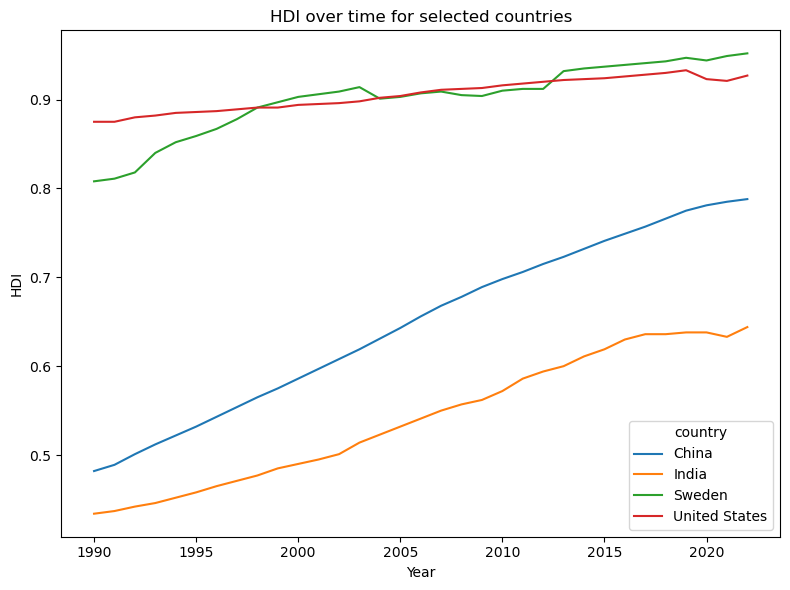

In [9]:
# Example: HDI trajectories over time for a few countries

countries_to_plot = ["China", "India", "Sweden", "United States"]

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=hdi_clean[hdi_clean["country"].isin(countries_to_plot)],
    x="year",
    y="hdi",
    hue="country"
)
plt.title("HDI over time for selected countries")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.tight_layout()
plt.show()

In [10]:
# Summary of population values in the cleaned data (real countries only)
hdi_clean["pop_millions"].describe()

# Min, median and max population by year
pop_by_year = (
    hdi_clean
    .groupby("year")["pop_millions"]
    .agg(["min", "median", "max"])
)

pop_by_year.head()

,min,median,max
year,,,
1990,0.009182,8.028525,1153.704253
1991,0.009354,8.237318,1170.626171
1992,0.009466,8.357305,1183.813389
1993,0.009517,8.441226,1195.855558
1994,0.009559,8.511341,1207.286675


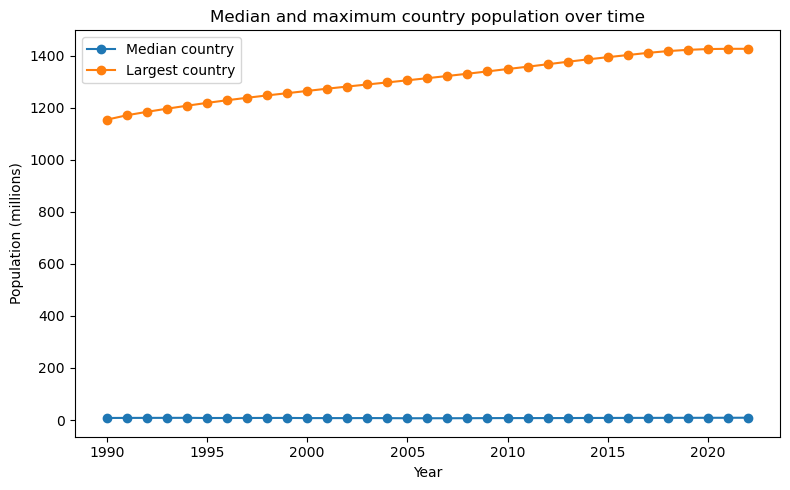

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(pop_by_year.index, pop_by_year["median"], marker="o", label="Median country")
plt.plot(pop_by_year.index, pop_by_year["max"], marker="o", label="Largest country")
plt.title("Median and maximum country population over time")
plt.xlabel("Year")
plt.ylabel("Population (millions)")
plt.legend()
plt.tight_layout()
plt.show()

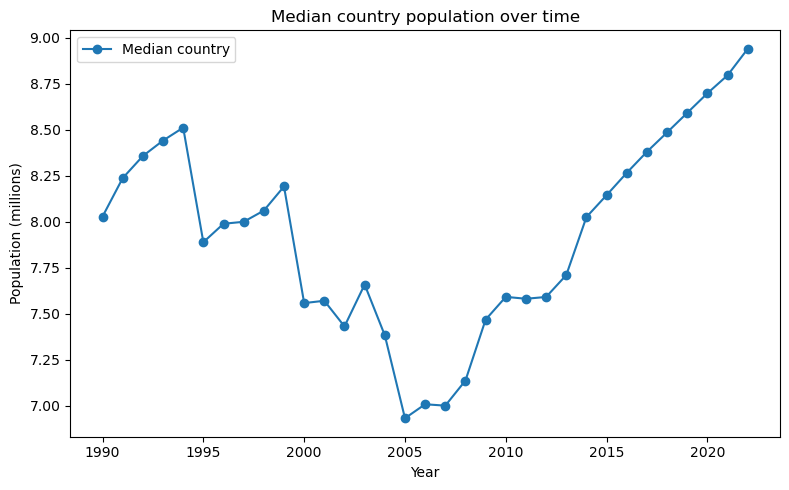

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(pop_by_year.index, pop_by_year["median"], marker="o", label="Median country")
plt.title("Median country population over time")
plt.xlabel("Year")
plt.ylabel("Population (millions)")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# Check overlap between Nobel and HDI countries (1990+)

nobel_countries = set(nobel_1990["country_std"].dropna().unique())
hdi_countries = set(hdi_clean["country"].unique())

print("Number of Nobel countries 1990+:", len(nobel_countries))
print("Number of HDI countries 1990+:", len(hdi_countries))
print("Countries present in both:", len(nobel_countries & hdi_countries))

# Nobel countries that still don't match any HDI country (if any)
sorted(nobel_countries - hdi_countries)[:20]


Number of Nobel countries 1990+: 47
Number of HDI countries 1990+: 193
Countries present in both: 47


[]

In [14]:
country_decade_merged = (
    nobel_country_decade
    .merge(
        hdi_decade,
        left_on=["country_std", "decade"],
        right_on=["country", "decade"],
        how="inner"
    )
)

country_decade_merged.head(), country_decade_merged.shape


(  country_std  decade  n_nobel    country  hdi_mean  pop_millions_mean
 0     Algeria    1990        1    Algeria    0.6125          28.090105
 1   Australia    1990        1  Australia    0.8782          17.924626
 2   Australia    2000        1  Australia    0.9095          20.174436
 3     Austria    1990        1    Austria    0.8439           7.895549
 4     Austria    2000        2    Austria    0.8863           8.187395,
 (88, 6))

In [15]:
country_decade_merged["nobel_per_million"] = (
    country_decade_merged["n_nobel"] / country_decade_merged["pop_millions_mean"]
)

country_decade_merged.sort_values("nobel_per_million", ascending=False).head(20)


,country_std,decade,n_nobel,country,hdi_mean,pop_millions_mean,nobel_per_million
67,Saint Lucia,1990,1,Saint Lucia,0.678400,0.150903,6.626782
76,Trinidad and Tobago,2000,1,Trinidad and Tobago,0.746700,1.365630,0.732263
37,Israel,2000,3,Israel,0.856000,6.655596,0.450749
73,Switzerland,1990,2,Switzerland,0.863800,6.975333,0.286725
38,Israel,2010,2,Israel,0.898700,7.951127,0.251537
52,New Zealand,2000,1,New Zealand,0.911300,4.089216,0.244546
4,Austria,2000,2,Austria,0.886300,8.187395,0.244278
5,Austria,2010,2,Austria,0.911100,8.610613,0.232272
53,Norway,2000,1,Norway,0.926400,4.629331,0.216014
32,Hungary,2020,2,Hungary,0.848667,9.809222,0.203890


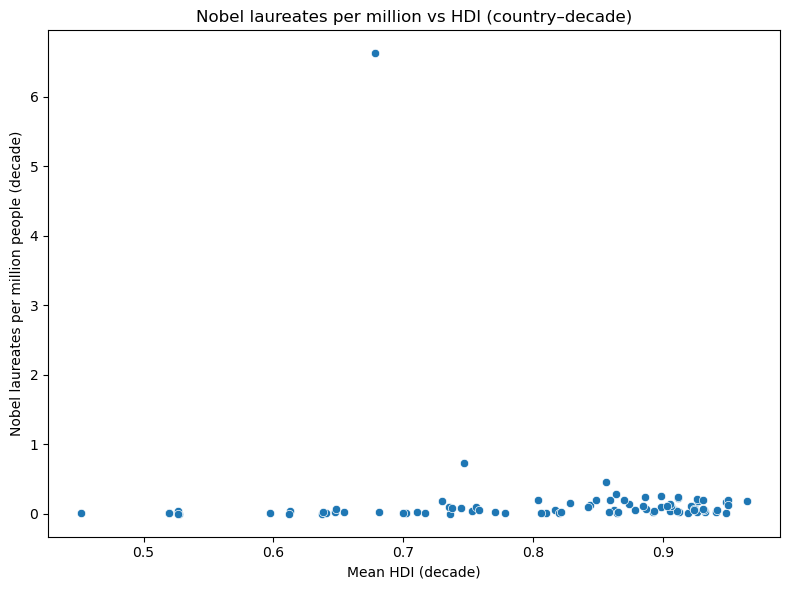

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=country_decade_merged,
    x="hdi_mean",
    y="nobel_per_million"
)
plt.title("Nobel laureates per million vs HDI (country–decade)")
plt.xlabel("Mean HDI (decade)")
plt.ylabel("Nobel laureates per million people (decade)")
plt.tight_layout()
plt.show()


In [17]:
corr = country_decade_merged["hdi_mean"].corr(country_decade_merged["nobel_per_million"])
print(f"Correlation between HDI and Nobel laureates per million: {corr:.3f}")


Correlation between HDI and Nobel laureates per million: -0.064


In [18]:
import statsmodels.formula.api as smf

# Drop rows where HDI is missing (e.g. Timor-Leste in 1990)
hdi_model_df = country_decade_merged.dropna(subset=["hdi_mean", "nobel_per_million"]).copy()

hdi_model = smf.ols(
    formula="nobel_per_million ~ hdi_mean",
    data=hdi_model_df
).fit()

hdi_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      nobel_per_million   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3542
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.553
Time:                        00:06:24   Log-Likelihood:                -93.448
No. Observations:                  88   AIC:                             190.9
Df Residuals:                      86   BIC:                             195.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4504      0.486      0.927      0.356      -0.515       1.416
hdi_mean      -0.3530      0.593     -0.595      0.553      -1.532       0.826
==============================================================================
Omnibus:                      185.065   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23043.965
Skew:                           8.757   Prob(JB):                         0.00
Kurtosis:                      80.318   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
hdi_coef = (
    hdi_model.params.to_frame("coef")
    .join(hdi_model.conf_int().rename(columns={0: "ci_low", 1: "ci_high"}))
    .round(4)
)

hdi_coef


,coef,ci_low,ci_high
Intercept,0.4504,-0.5152,1.4159
hdi_mean,-0.3530,-1.5322,0.8261


In this dataset, HDI alone does not explain why some countries have more Nobel laureates per capita. The relationship between HDI and Nobel laureates per million is very weak and statistically insignificant (R² ≈ 0.004).

Saint Lucia makes data more complicated to understand, because the country is so small.

In [20]:
# Just to check: which rows have the largest Nobel per million?
country_decade_merged.sort_values("nobel_per_million", ascending=False).head(10)


,country_std,decade,n_nobel,country,hdi_mean,pop_millions_mean,nobel_per_million
67,Saint Lucia,1990,1,Saint Lucia,0.678400,0.150903,6.626782
76,Trinidad and Tobago,2000,1,Trinidad and Tobago,0.746700,1.365630,0.732263
37,Israel,2000,3,Israel,0.856000,6.655596,0.450749
73,Switzerland,1990,2,Switzerland,0.863800,6.975333,0.286725
38,Israel,2010,2,Israel,0.898700,7.951127,0.251537
52,New Zealand,2000,1,New Zealand,0.911300,4.089216,0.244546
4,Austria,2000,2,Austria,0.886300,8.187395,0.244278
5,Austria,2010,2,Austria,0.911100,8.610613,0.232272
53,Norway,2000,1,Norway,0.926400,4.629331,0.216014
32,Hungary,2020,2,Hungary,0.848667,9.809222,0.203890


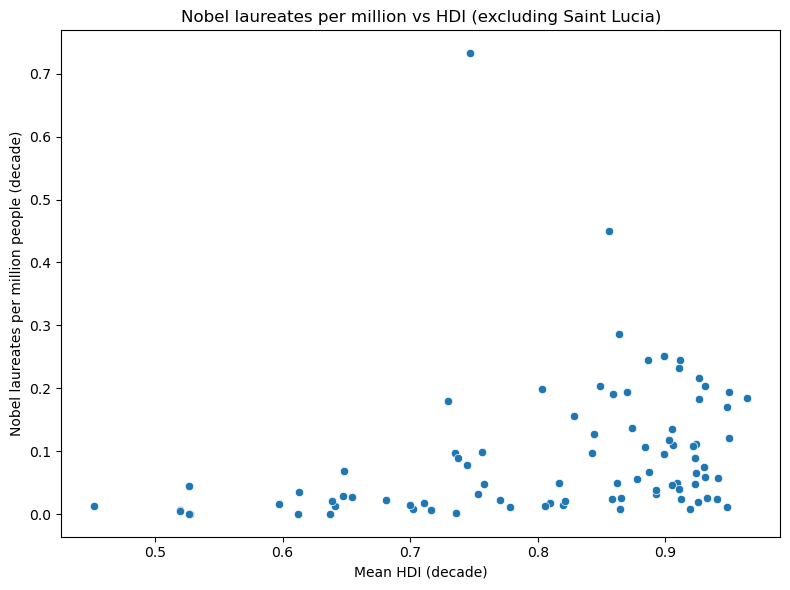

Correlation (excluding Saint Lucia): 0.291


In [21]:
# Remove Saint Lucia as an obvious outlier
country_decade_no_stlucia = country_decade_merged[
    country_decade_merged["country_std"] != "Saint Lucia"
].copy()

# Scatter plot without Saint Lucia
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=country_decade_no_stlucia,
    x="hdi_mean",
    y="nobel_per_million"
)
plt.title("Nobel laureates per million vs HDI (excluding Saint Lucia)")
plt.xlabel("Mean HDI (decade)")
plt.ylabel("Nobel laureates per million people (decade)")
plt.tight_layout()
plt.show()

# Correlation without Saint Lucia
corr_no_stlucia = country_decade_no_stlucia["hdi_mean"].corr(
    country_decade_no_stlucia["nobel_per_million"]
)
print(f"Correlation (excluding Saint Lucia): {corr_no_stlucia:.3f}")


In [22]:
hdi_model_df = country_decade_no_stlucia.dropna(
    subset=["hdi_mean", "nobel_per_million"]
).copy()

hdi_model = smf.ols(
    formula="nobel_per_million ~ hdi_mean",
    data=hdi_model_df
).fit()

hdi_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      nobel_per_million   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7.866
Date:                Mon, 08 Dec 2025   Prob (F-statistic):            0.00624
Time:                        00:06:25   Log-Likelihood:                 73.389
No. Observations:                  87   AIC:                            -142.8
Df Residuals:                      85   BIC:                            -137.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1113      0.073     -1.528      0.130      -0.256       0.034
hdi_mean       0.2490      0.089      2.805      0.006       0.072       0.426
==============================================================================
Omnibus:                       94.360   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1238.012
Skew:                           3.406   Prob(JB):                    1.48e-269
Kurtosis:                      20.179   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After excluding Saint Lucia (a microstate with 1 laureate and only 150k inhabitants, giving 6.6 laureates per million), the correlation between HDI and Nobel laureates per million people is r ≈ 0.29.

A simple linear regression shows a small but statistically significant positive effect of HDI on Nobel prizes per capita (β ≈ 0.25, p ≈ 0.006).

However, the model explains only about 8–9% of the variation (R² ≈ 0.085), meaning that HDI alone is far from sufficient to predict how many Nobel laureates a country produces. Many other historical and structural factors must be involved.

In [23]:
# Sort to get proper decade order within each country
panel = country_decade_no_stlucia.sort_values(["country_std", "decade"]).copy()

# Change in HDI and Nobel per million between consecutive decades
panel["delta_hdi"] = panel.groupby("country_std")["hdi_mean"].diff()
panel["delta_nobel_per_million"] = panel.groupby("country_std")["nobel_per_million"].diff()

# Keep only rows where both changes are defined
panel_change = panel.dropna(subset=["delta_hdi", "delta_nobel_per_million"]).copy()

panel_change[["country_std", "decade", "delta_hdi", "delta_nobel_per_million"]].head()


,country_std,decade,delta_hdi,delta_nobel_per_million
2,Australia,2000,0.0313,-0.006221
4,Austria,2000,0.0424,0.117624
5,Austria,2010,0.0248,-0.012006
8,Belgium,2010,0.0245,-0.005932
10,Canada,2010,0.0504,-0.025234


In [24]:
corr_change = panel_change["delta_hdi"].corr(panel_change["delta_nobel_per_million"])
print(f"Correlation between changes: {corr_change:.3f}")

Correlation between changes: 0.020


In [25]:
change_model = smf.ols(
    formula="delta_nobel_per_million ~ delta_hdi",
    data=panel_change
).fit()

change_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     delta_nobel_per_million   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.025
Method:                      Least Squares   F-statistic:                   0.01638
Date:                     Mon, 08 Dec 2025   Prob (F-statistic):              0.899
Time:                             00:06:25   Log-Likelihood:                 60.726
No. Observations:                       42   AIC:                            -117.5
Df Residuals:                           40   BIC:                            -114.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0162      0.015     -1.106      0.275      -0.046       0.013
delta_hdi      0.0350      0.273      0.128      0.899      -0.517       0.587
==============================================================================
Omnibus:                       11.462   Durbin-Watson:                   2.412
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.237
Skew:                          -0.785   Prob(JB):                     0.000491
Kurtosis:                       5.498   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Center decade in 10-year units (1990 = 0, 2000 = 1, 2010 = 2, ...)
country_decade_no_stlucia["decade_c10"] = (country_decade_no_stlucia["decade"] - 1990) / 10

model_time_only = smf.ols(
    formula="nobel_per_million ~ decade_c10",
    data=country_decade_no_stlucia
).fit()

model_hdi_and_time = smf.ols(
    formula="nobel_per_million ~ hdi_mean + decade_c10",
    data=country_decade_no_stlucia
).fit()

print(model_time_only.summary())
print(model_hdi_and_time.summary())

                            OLS Regression Results                            
Dep. Variable:      nobel_per_million   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8440
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.361
Time:                        00:06:25   Log-Likelihood:                 69.968
No. Observations:                  87   AIC:                            -135.9
Df Residuals:                      85   BIC:                            -131.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1056      0.020      5.235      0.0